In [1]:
from datetime import datetime

from sklearn.preprocessing import StandardScaler

import pandas as pd

import matplotlib.pyplot as plt

## **Getting and Handling Data**

In [2]:
df_btc = pd.read_csv('btc.csv')
df_btc.head(5)

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,5/26/2018,BTCUSD,7459.11,7640.46,7380.00,7520.00,2722.80,2.042265e+07
1,5/25/2018,BTCUSD,7584.15,7661.85,7326.94,7459.11,8491.93,6.342069e+07
2,5/24/2018,BTCUSD,7505.00,7734.99,7269.00,7584.15,11033.72,8.293137e+07
3,5/23/2018,BTCUSD,7987.70,8030.00,7433.19,7505.00,14905.99,1.148104e+08
4,5/22/2018,BTCUSD,8393.44,8400.00,7950.00,7987.70,6589.43,5.389753e+07


In [3]:
df_btc['Date'] = df_btc['Date'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y'))

In [4]:
df_btc

,Date,Symbol,Open,High,Low,Close,Volume From,Volume To
0,2018-05-26,BTCUSD,7459.11,7640.46,7380.00,7520.00,2722.80000,2.042265e+07
1,2018-05-25,BTCUSD,7584.15,7661.85,7326.94,7459.11,8491.93000,6.342069e+07
2,2018-05-24,BTCUSD,7505.00,7734.99,7269.00,7584.15,11033.72000,8.293137e+07
3,2018-05-23,BTCUSD,7987.70,8030.00,7433.19,7505.00,14905.99000,1.148104e+08
4,2018-05-22,BTCUSD,8393.44,8400.00,7950.00,7987.70,6589.43000,5.389753e+07
...,...,...,...,...,...,...,...,...
1268,2014-12-05,BTCUSD,377.10,377.10,377.10,377.10,0.00000,0.000000e+00
1269,2014-12-04,BTCUSD,378.00,378.00,377.10,377.10,0.01000,3.770000e+00
1270,2014-12-03,BTCUSD,378.00,378.00,377.01,378.00,0.54660,2.065200e+02
1271,2014-12-02,BTCUSD,370.00,378.00,370.00,378.00,15.01000,5.675070e+03


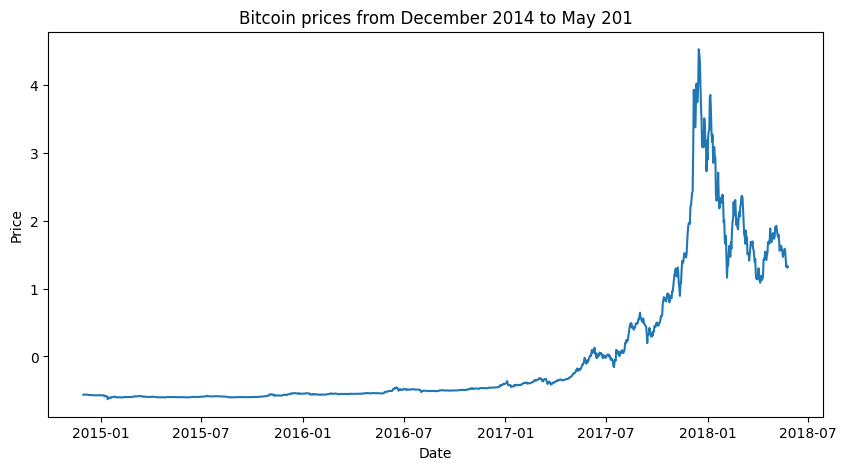

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))

df_btc_orderned = df_btc.sort_values(by='Date')
target_orderned = df_btc_orderned['Close'].values

scaled_data_orderned = StandardScaler().fit_transform(target_orderned.reshape(-1, 1))

ax.plot(df_btc_orderned['Date'], scaled_data_orderned)

ax.set_title('Bitcoin prices from December 2014 to May 201')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()

In [6]:
target = df_btc['Close'].values
scaled_data = StandardScaler().fit_transform(target.reshape(-1, 1))

In [7]:
from network.split_data import split_data

window_size = 7
X_train, y_train, X_test, y_test = split_data(scaled_data, window_size, 0.2)

print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (1013, 7, 1)
y_train size: (1013, 1)
X_test size: (253, 7, 1)
y_test size: (253, 1)


## **Model selection**
### 1) RNNs can process sequential data by maintaining a hidden state that captures information about past inputs, allowing it to consider the entire history of the data when making a prediction.
### 2) A Long Short-Term Memory (LSTM) model can be a suitable choice for predicting Bitcoin close values due to its ability to capture long-term dependencies in the data while avoiding the vanishing gradient problem that occurs in traditional RNNs.

In [8]:
from network.network import LSTM_Network

Instructions for updating:
non-resource variables are not supported in the long term


## **Parameters selection**
### Conducting a grid search to identify the parameter values that result in the lowest loss.

In [9]:
import itertools

parameters = {
    'batch_size': [7],
    'hidden_layer': [128, 256],
    'learning_rate': [0.001, 0.1],
    'epochs': [100, 200]
}

combinations = [p for p in itertools.product(*parameters.values())]

In [10]:
best_params = None
lower_loss = float('inf')

for params in combinations:
    try:
        batch_size, hidden_layer, learning_rate, epochs = params
        network = LSTM_Network(batch_size, batch_size, hidden_layer, learning_rate, epochs)

        loss = network.train(X_train, y_train)

        if loss < lower_loss:
            best_params = params
            lower_loss = loss
    except:
        pass

In [11]:
best_params

(7, 256, 0.001, 100)

In [12]:
batch_size, hidden_layer, learning_rate, epochs = best_params
lstm_net = LSTM_Network(batch_size, batch_size, hidden_layer, learning_rate, epochs)

## **Training model**

In [13]:
lstm_net.train(X_train, y_train, verbose=True)

Epoch 0/100  Current loss: 0.008924942463636398
Epoch 25/100  Current loss: 0.0003576708259060979
Epoch 50/100  Current loss: 0.00024773008772172034
Epoch 75/100  Current loss: 0.000300453306408599


0.00024324705

In [14]:
sup = []

trained_scores = lstm_net.traind_scores

for i in range(len(trained_scores)):
    for j in range(len(trained_scores[i])):
        sup.append(trained_scores[i][j][0])

In [15]:
trained_scores

[[array([[0.4389304]], dtype=float32),
  array([[0.45284462]], dtype=float32),
  array([[0.5162574]], dtype=float32),
  array([[0.51700723]], dtype=float32),
  array([[0.471713]], dtype=float32),
  array([[0.46451062]], dtype=float32),
  array([[0.50493246]], dtype=float32)],
 [array([[0.5502515]], dtype=float32),
  array([[0.6175406]], dtype=float32),
  array([[0.57376534]], dtype=float32),
  array([[0.52508664]], dtype=float32),
  array([[0.50616366]], dtype=float32),
  array([[0.4690607]], dtype=float32),
  array([[0.45416743]], dtype=float32)],
 [array([[0.47614107]], dtype=float32),
  array([[0.4909812]], dtype=float32),
  array([[0.48119465]], dtype=float32),
  array([[0.4344969]], dtype=float32),
  array([[0.41199788]], dtype=float32),
  array([[0.3888061]], dtype=float32),
  array([[0.40486562]], dtype=float32)],
 [array([[0.45521867]], dtype=float32),
  array([[0.45032614]], dtype=float32),
  array([[0.4918298]], dtype=float32),
  array([[0.5204686]], dtype=float32),
  array([

## **Testing model**

In [16]:
testing_results = lstm_net.test(X_test)

In [17]:
sup_orderned = sup.copy()
sup_orderned.reverse()

In [18]:
test_predicted = [x for x in testing_results if x != None]
test_predicted.reverse()
testing_orderned = [None] * testing_results.count(None) + test_predicted

c:\Users\yveem\miniconda3\envs\machine_learning\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


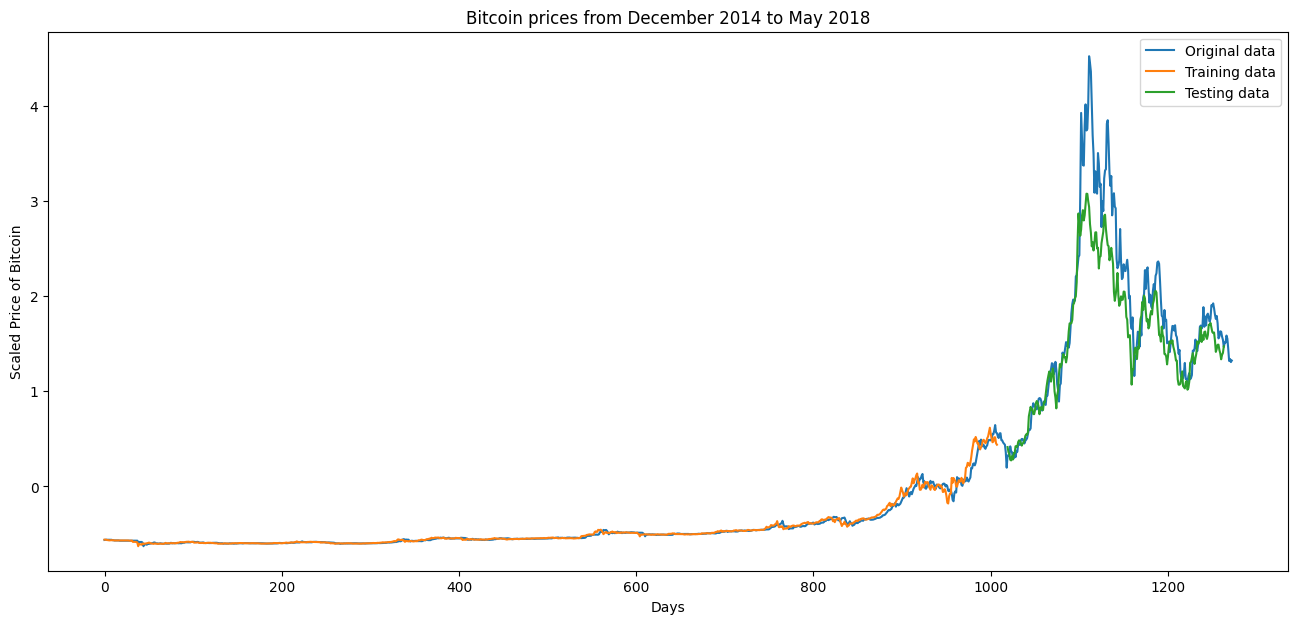

In [19]:
plt.figure(figsize=(16, 7))
plt.title('Bitcoin prices from December 2014 to May 2018')
plt.xlabel('Days')
plt.ylabel('Scaled Price of Bitcoin')
plt.plot(scaled_data_orderned, label='Original data')
plt.plot(sup_orderned, label='Training data')
plt.plot(testing_orderned, label='Testing data')
plt.legend()
plt.show()